In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix,
    roc_auc_score, roc_curve,precision_score, recall_score, f1_score
)
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)


df = pd.read_csv("D:/AI WORKSHOP/TASK/BOOSTING_task/UCI_Credit_Card.csv")



In [35]:
X = df.drop(columns=["ID", "default.payment.next.month"])
y = df["default.payment.next.month"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
base_estimator = DecisionTreeClassifier(max_depth=3, random_state=42)
ada = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=500,
    learning_rate=0.1,
    random_state=42
)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
sm = SMOTE(random_state=42)
ada.fit(X_train_res, y_train_res)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
y_proba = ada.predict_proba(X_test)[:, 1]

In [36]:
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8172
ROC-AUC: 0.7767
Precision: 0.6615
Recall: 0.3549
F1 Score: 0.4620


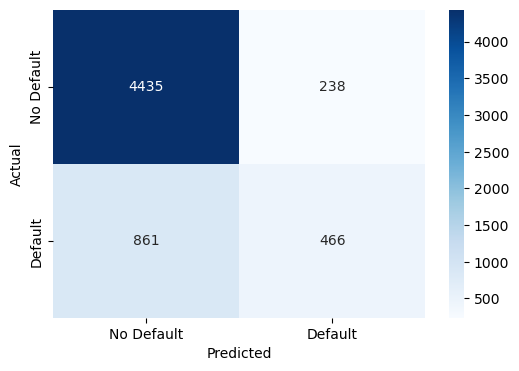

In [34]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Default", "Default"],
            yticklabels=["No Default", "Default"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

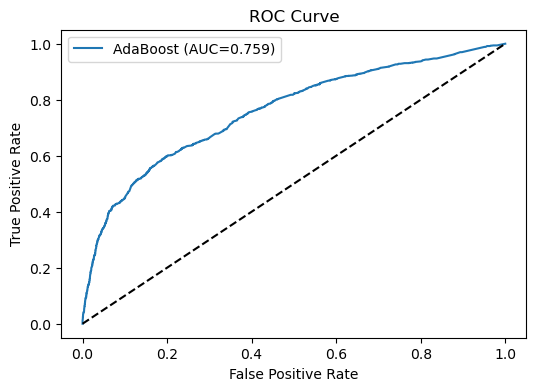

In [27]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AdaBoost (AUC={roc_auc:.3f})")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()